# Graphics

<!-- SUMMARY: Use the library gtlearn.plot (based on matplotlib) to visualize all the objects of gstlearn library -->

<!-- CATEGORY: Courses -->

The module gstlearn.plot contains various plot functions for gstlearn objets: DbGrid, Db, Vario, Model, Polygons... These functions are also accessible as methods of each class. For example for a grid, we could use equivalently gp.grid(mygrid,...) or mygrid.plot(...), or for more specific functions: gp.point(mygrid,...) or mygrid.plot_point(...)

## Import packages

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc

gdoc.setNoScroll()
gl.defineDefaultSpace(gl.ESpaceType.RN, 2)

<IPython.core.display.Javascript object>

## General principle

The paragraph describes the deiferrent manners for calling the graphics contained in gstlearn.plot package. This is demonstrated on an example of a 2-D data set, organized as a set of isolated points (called **mydb**)


In [2]:
mydb = gl.Db.createFillRandom(ndat=30, nvar=3)
mydb


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 6
Total number of samples      = 30

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x-1 - Locator = x1
Column = 2 - Name = x-2 - Locator = x2
Column = 3 - Name = z-1 - Locator = z1
Column = 4 - Name = z-2 - Locator = z2
Column = 5 - Name = z-3 - Locator = z3

In order to illustrate the use of this extensive version which allows overlay of several layers of information, we quickly create a polygon constituted as the (dilated) convex hull of the data (this option will be used later in this document).

In [3]:
mypoly = gl.Polygons.createFromDb(mydb, dilate=0.05)

The overlay can be handled as follows, e.g. by routing the different graphics on the same **Axis**.

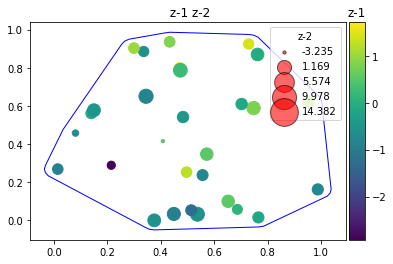

In [4]:
fig, ax = plt.subplots()
ax.symbol(mydb, nameSize="z-2", nameColor="z-1", 
                flagLegendColor=True, flagLegendSize=True)
ax.polygon(mypoly)
plt.show()

### Calling the specific function

You can also be more specific by calling a function named explicitely. This is the case for displaying the literal values attached to each sample: the method is named **literal**. 

Again the call to this function is covered using different syntaxes.

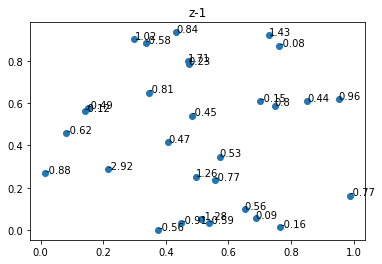

In [5]:
dum = gp.literal(mydb, name="z-1")

Fincally the same function can be specified as a method of the class Axis

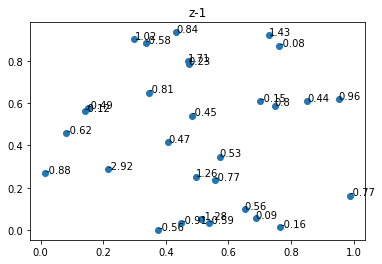

In [6]:
fix, ax = plt.subplots()
ax.literal(mydb, name="z-1")
plt.show()

## Model representation

Creating a dummy Model used for simulating a random field and display it

In [7]:
mymodel = gl.Model.createFromParam(gl.ECov.CUBIC,10,1,1.5)
cova = mymodel.getCovAniso(0)

This first case gives the demonstration that we can combine gstlearn.plot functions with matplotlib functions. This is what is performed by representing a Model and adding some annotation.
As an example, we wish to add the formula of the covariance represented, i.e.:

In [8]:
from IPython.display import display, Latex
display(Latex('$%s$'%cova.getFormula()))

<IPython.core.display.Latex object>

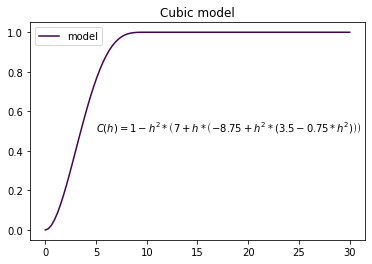

In [9]:
fig, ax = plt.subplots()                              
ax.model(mymodel, flagLegend=True)                    
ax.decoration(title="Cubic model")                    
ax.text(5,0.5,'$%s$'%cova.getFormula(),size='medium') 
plt.show()                                            

## Grid representations

We create a rectangular non-rotated 2-D grid, and simulate random Gaussian field (using the Model previously defined). Two simulations are generated in order to emphasize the graphic posibilities in further parts of this note.

In [10]:
nx = [70,25]
dx = [1,2]
x0 = [-40, 20]
mygrid = gl.DbGrid.create(nx,dx,x0)

err = gl.simtub(None,mygrid,mymodel,None,2)

Add a dummy selection to test visualization with Selection

In [11]:
mygrid["sel"] = 1. - (mygrid["x1"] > 0) * (mygrid["x1"] < 15) * (mygrid["x2"] > 40) * (mygrid["x2"] < 50)
mygrid.setLocator("sel",gl.ELoc.SEL)

### Non Rotated Grid

We simply represent the grid (using the defaulted color scale). As no variable nor representation is explicitely specified, the default variable is represented using the default representation (i.e. raster). The default variable is the first Z-locator variable (if any) or the variable created last in the file otherwise. 

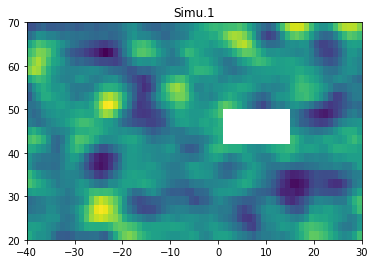

In [12]:
dum = gp.raster(mygrid)

This is the opportunity to describe the mechanism for calling the functions of gstlearn.plot.

We have essentially 2 possible levels of calls:

- the most elementary one. We initiate the figure (returned argument *fig*) and the canvas (returned argument *ax*) as a **geographical** figure. Then we add a raster visualization of the first simulation. The dedicated function (**raster**) returns a description of the intended facility (here a *QuadMesh*). This enables the user to elaborate on this returned argument. This form is dedicated to expert: the form of the next paragraph should be prefered.

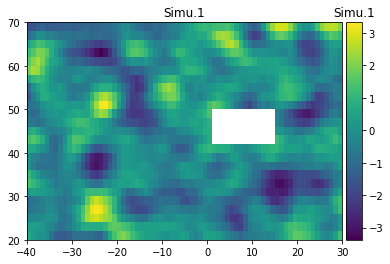

In [13]:
res = gp.raster(mygrid, name="Simu.1", flagLegend=True)

- a second version which suits with the object-based technique. The function **raster** has been added as a method for the matplotlib.Axes object (*ax*). On this case, we also added the isovalue representation of the second simulation outcome.

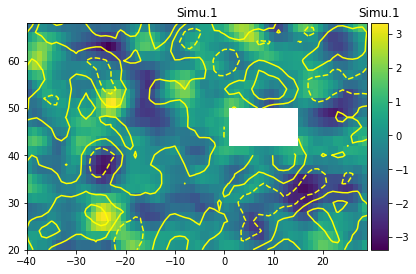

In [14]:
fig, ax = plt.subplots(1,1)
plt.tight_layout(pad=2)
ax.raster(mygrid, name="Simu.1", flagLegend=True)
ax.isoline(mygrid, name="Simu.2", colors="yellow")
plt.show()

We can also choose to use a representation per grid node. As a matter of fact, we wish to represent the grid nodes as a set of points, whose size will correspond to the first simulation and whose color will correspond to the second simulation.
In this last representation, we will also provide a title and some specific labels on axes.

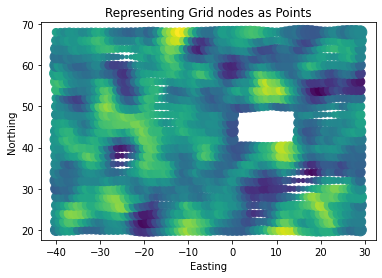

In [15]:
fig, ax = plt.subplots()
ax.symbol(mygrid,nameSize="Simu.1",nameColor="Simu.2")
ax.decoration(title = "Representing Grid nodes as Points", xlabel="Easting", ylabel="Northing")
plt.show()

We can create a specific ColorScale, containing a limited number of colors, and sampling a given reference Color Scale. 

For the next figure, we use the one defaulted by the system ('viridis') for sake of understanding. We simply reduce the number of colors

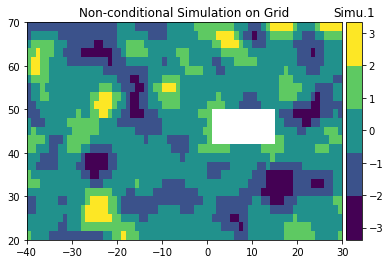

In [16]:
cmap = gp.getColorMap(5,'viridis')
fig, ax = plt.subplots()
ax.raster(mygrid, name="Simu.1", cmap=cmap, flagLegend=True)
ax.decoration(title="Non-conditional Simulation on Grid")
plt.show()

We can also change the reference color scale (using the one defaulted by the method getColorMap for example: 'gist rainbow') and increase the number of colors

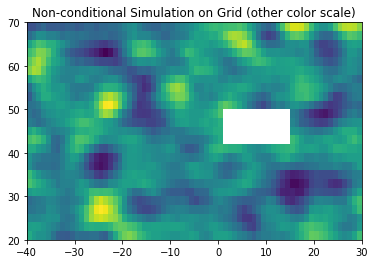

In [17]:
cmap = gp.getColorMap(100)
fig, ax = plt.subplots()
ax.raster(mygrid,name="Simu.1",cmap=cmap)
ax.decoration(title="Non-conditional Simulation on Grid (other color scale)")
plt.show()

We have the same type of functions (as demonstrated for points and/or grids) for objects such as histograms of the values collected in the a data base (e.g. a simulation outcome over the grid), calling the relevant function in an object-based fashion

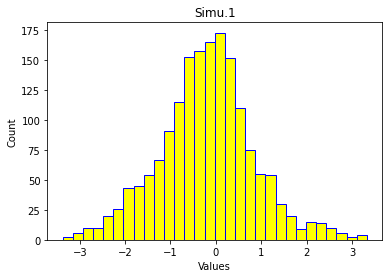

In [18]:
fig, ax = plt.subplots()
ax.histogram(mygrid,name="Simu.1", bins=30, color='yellow', edgecolor="blue")
plt.show()

Representing a scatter plot between two variables stored on the same Db. Note that 'cmin' is used to avoid coloring the grid meshes where the count of samples is zero.

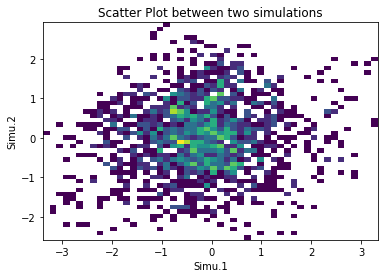

In [19]:
fig, ax = plt.subplots()
ax.correlation(mygrid,"Simu.1","Simu.2", bins=50, cmin=1)
ax.decoration(title="Scatter Plot between two simulations")
plt.show()

### Set of Points and Polygon

A set of points is sampled from the previous Grid and stored in a new Point Db. The number of samples if fixed to 1% of the number of grid nodes.

In [20]:
mypoint = gl.Db()
mypoint.resetSamplingDb(mygrid,0.01)
mypoint.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 7
Total number of samples      = 17
Number of active samples     = 17

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = rank.1 - Locator = NA
Column = 2 - Name = x1 - Locator = x1
Column = 3 - Name = x2 - Locator = x2
Column = 4 - Name = Simu.1 - Locator = z1
Column = 5 - Name = Simu.2 - Locator = z2
Column = 6 - Name = sel - Locator = sel


We create a polygon as the convex hull of the samples

In [21]:
mypoly = gl.Polygons.createFromDb(mypoint)

We now display the points (as no variable name is mentioned, the samples are posted using a constant size and color) and the polygon on top of the grid.

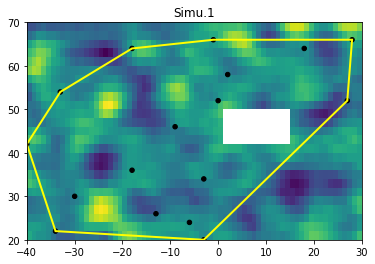

In [22]:
fig, ax = plt.subplots()
ax.raster(mygrid, name="Simu.1")
ax.symbol(mypoint, c="black", flagLegendSize=True, flagLegendColor=True)
ax.polygon(mypoly,flagFace=False, edgecolor='yellow', linewidth=2)
plt.show()

### Rotated grid (angle = 20 degrees)

We create the same grid as before but with a rotation of 20 degrees. Note that the rotated grid does not have any selection.

In [23]:
mygridr = gl.DbGrid.create(nx,dx,x0,[20,0])
err = gl.simtub(None,mygridr,mymodel,nbsimu=2)

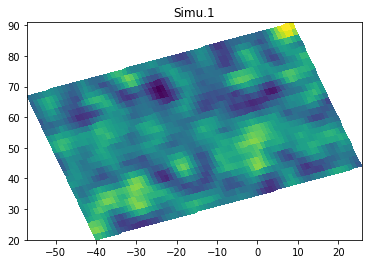

In [24]:
fig, ax = plt.subplots()
ax.raster(mygridr,name="Simu.1")
plt.show()

A new set of Points is sampled from the rotated Grid. As the same seed is used, the ranks of the selected samples within the grid are the same. Furthermore, we generate the Polygon as the convex hull of the newly created Point db.

In [25]:
mypointr = gl.Db()
mypointr.resetSamplingDb(mygridr,0.01)
mypolyr = gl.Polygons.createFromDb(mypointr)

We represent again the three components (grid, points and polygon) on the same view

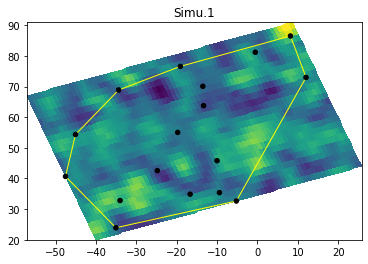

In [26]:
fig, ax = plt.subplots()
ax.raster(mygridr, name="Simu.1")
ax.polygon(mypolyr,flagFace=False,edgecolor='yellow')
ax.symbol(mypointr,c="black")
plt.show()

Let us now add a selection in order to restrict the previous representation to the only non-masked samples

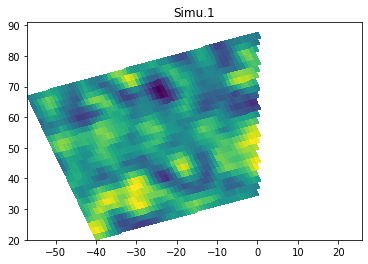

In [27]:
tab = mygridr.getColumn("x1")
sel = (np.asarray(tab) < 0).astype(float)
mygridr.addSelection(tuple(sel),'sel')

fig, ax = plt.subplots()
ax.raster(mygridr,name="Simu.1",useSel=True)
plt.show()

## Share legend between two plots
This paragraph is meant to present the possibility of splitting a figure in two scenes, to represent a grid in each scene (for example) and share the (same) color scale for the two scenes.

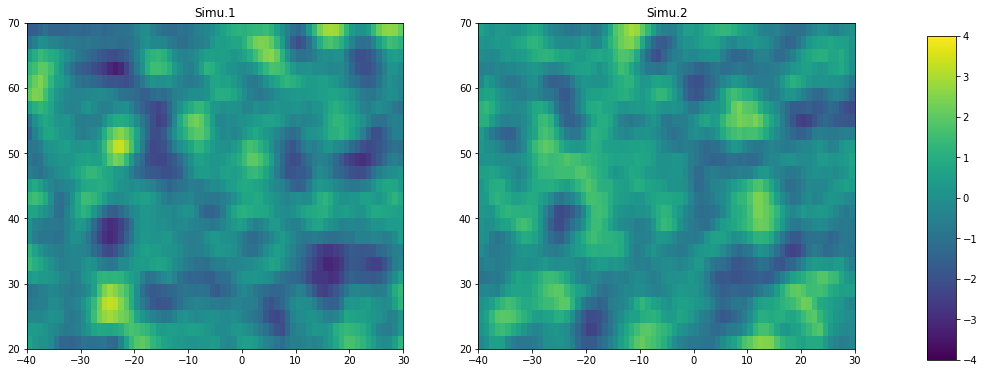

In [28]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
vmin = -4
vmax = +4
ax[0].raster(mygrid,name="Simu.1", useSel=False, vmin=vmin, vmax=vmax)
ax[1].raster(mygrid,name="Simu.2", useSel=False, vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.7)
cbar_ax = fig.add_axes([0.75, 0.1, 0.02, 0.75])

im = ax[0].collections[0] # get mappable described by the colorbar
err = fig.colorbar(im, cax = cbar_ax)
plt.show()

## Display points with fixed colors

In this paragraph, we wish to display sample points with given colors.

The values at sample locations (coordinates and variable values) are provided sample per sample in array called 'tab'.

In [29]:
tab = [1., 1., 1., 2., 2., 3., 3., 3., 5.]
dat1 = gl.Db.createFromSamples(3, gl.ELoadBy.SAMPLE, tab, names=["x","y","z"], locatorNames=["x1","x2","z"])
dbfmt = gl.DbStringFormat.createFromFlags(flag_resume=True, flag_array=True)
dat1.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Total number of samples      = 3

Data Base Contents
------------------
                 rank         x         y         z
     [  0,]     1.000     1.000     1.000     1.000
     [  1,]     2.000     2.000     2.000     3.000
     [  2,]     3.000     3.000     3.000     5.000

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x - Locator = x1
Column = 2 - Name = y - Locator = x2
Column = 3 - Name = z - Locator = z1


We represent the samples without using any pre-specified color map. The system uses the default color scale and assigns the lowest value to be represented to the first color and the largest value to the last color.
For all subsequent graphics, the dimensions of the non-geographical plots is fixed.

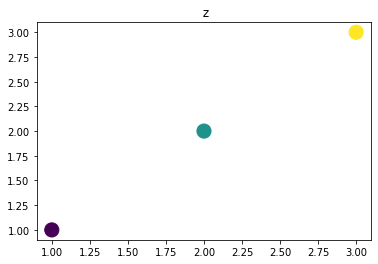

In [30]:
fig, ax = plt.subplots()
ax.symbol(dat1,nameColor="z",s=200)
plt.show()

Representing using a given color map (based on few colors [5]). The color scale is now discrete but the system still assigns the lowest value (i.e. 1) to the first color and the largest value (i.e. 5) to the last color

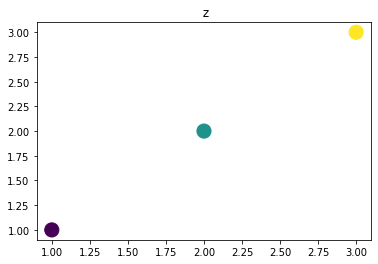

In [31]:
ncol = 5
cmap = gp.getColorMap(ncol)
fig, ax = plt.subplots()
ax.symbol(dat1,nameColor="z",s=200,cmap=cmap)
plt.show()

We use a new Db where the values at first sample has been modified (from 1 to 4) while the other have been left unchanged. We use the same color scale as before. Again the lowest value (i.e. 3) is assigned to the first color and the largest value (i.e. 5) to the last color.

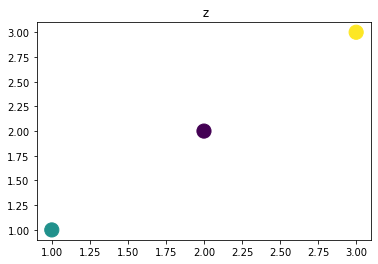

In [32]:
tab = [1., 1., 4., 2., 2., 3., 3., 3., 5.]
dat2 = gl.Db.createFromSamples(3, gl.ELoadBy.SAMPLE, tab, ["x","y","z"], ["x1","x2","z"])

fig, ax = plt.subplots()
ax.symbol(dat2,nameColor="z",s=200,cmap=cmap)
plt.show()

# Superimposing figures

In this section, we demonstrate the possibilities offered by the graphics for working with multiple figures and overlaying graphics. This is described through the use of variograms and models.
For this reason we consider the two non-conditional simulations created earllier on the existing grid. We calculate the simple and cross variograms along the two main axes of the grid and fit a model automatically.
Finally, we can play with the experimental variogram calculated for two variables (then refering to simple and cross-variograms), and the fitted bivariate model.

In [33]:
varioparam = gl.VarioParam.createMultipleFromGrid(mygrid, nlag=10)
vario = gl.Vario(varioparam)
err = vario.compute(mygrid, gl.ECalcVario.VARIOGRAM)

model = gl.Model()
err = model.fit(vario,[gl.ECov.CUBIC])

### Several ways for displaying experimental variograms

In the next graphic, we produce the simple variogram of the first variable calculated in the first direction. Note that in all subsequent plots, we will use the same dimension for the elementary plot (which is set as a default)

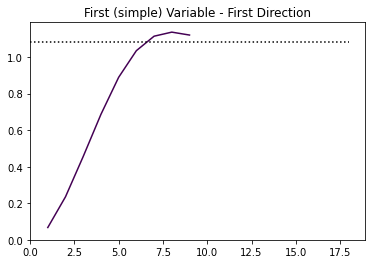

In [34]:
fig, ax = plt.subplots()
ax.variogram(vario, ivar=0, jvar=0, idir=0)
ax.decoration(title="First (simple) Variable - First Direction")
plt.show()

In the next graphic, we produce a single figure where the variograms of the first variable calculated in the first direction (black) and the second direction (red) are overlaid. The overlay is performed manually.

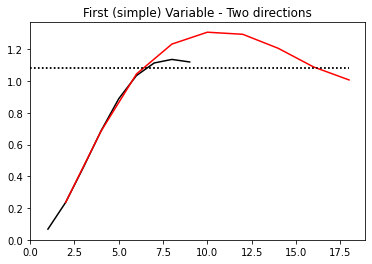

In [35]:
fig, ax = plt.subplots()
ax.variogram(vario, idir=0, ivar=0, jvar=0, color="black")
ax.variogram(vario, idir=1, ivar=0, jvar=0, color='red')
ax.decoration(title="First (simple) Variable - Two directions")
plt.show()

In the next graphic, we produce a single graphic where the cross-variograms between first and second variables are displayed for all directions. The colors are extracted from the Color Map provided as argument (here defaulted).

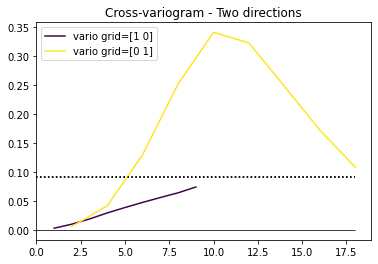

In [36]:
fig, ax = plt.subplots()
ax.variogram(vario,ivar=1,jvar=0,idir=-1, flagLegend=True)
ax.decoration(title="Cross-variogram - Two directions")
plt.show()

In the next figure, we draw the first direction and overlay the second direction (on purpose using two statements). Moreover we also change the dimensions of the plot.

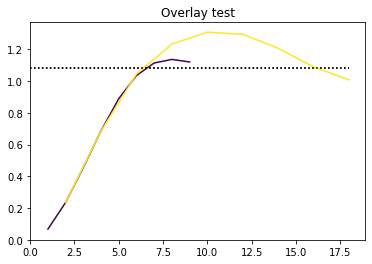

In [37]:
fig, ax = plt.subplots()
ax.variogram(vario,idir=0,ivar=0,jvar=0,cmap=cmap)
ax.variogram(vario,idir=1,ivar=0,jvar=0)
ax.decoration(title="Overlay test")
plt.show()

All graphic representations that were produced up to now were essentially performed with either a single view (or Axes). The exercise performed earlier with two view in the same figure was handled by the user, calling **subplots** facility explicaitly.

In the next examples, we will directly consider a figure consituted of many views. This is the case of the multivariate variograms and/or models. In other words, we wish to call the graphic representation, providing a single multivariate variogram and let the facility create all the necessary subplots. Moreover, we want to be able to consider this set of subplots (containing the experimental variograms for example) and overlay the model.

This requires using the other argument (**fig**) returned by the graphic initialization function (**gp.init**) which is called passing the expected number of rows and columns to be present in the figure. In our case, as the variogram is calculated for 2 variables, the figure should contain 2 rows and 2 columns.

Representing all simple and cross variograms for all directions. 

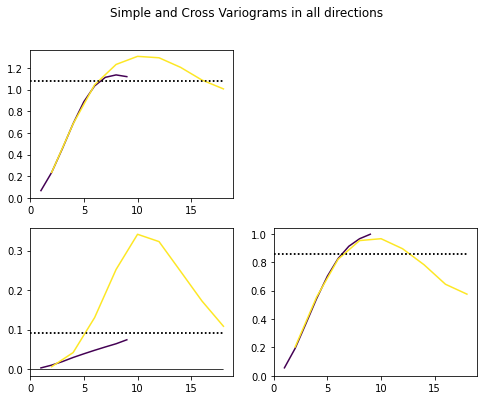

In [38]:
nv = vario.getNVar()
fig, axs = plt.subplots(nv,nv, figsize=(8,6))
fig.variogram(vario,ivar=-1,jvar=-1,idir=-1,cmap=cmap)
fig.decoration(title="Simple and Cross Variograms in all directions")
plt.show()

### Several ways for representing the Model

Represent the Model calculated for the second variable. If the Model is not isotropic, the plot should differ per direction: as direction has not been mentionned, the first direction (of the geographic sysrtem) is used by default.

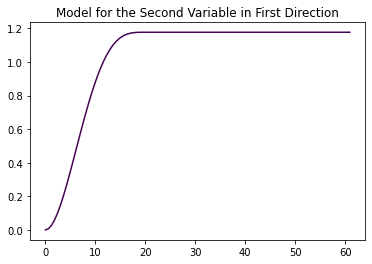

In [39]:
fig, ax = plt.subplots()
ax.model(model,ivar=1,jvar=1)
ax.decoration(title="Model for the Second Variable in First Direction")
plt.show()

Representing all simple and cross variograms together with the fitted model for the all directions.

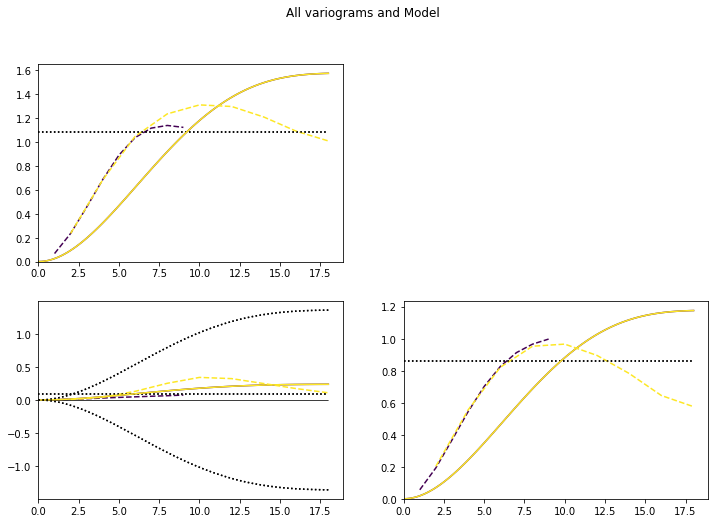

In [40]:
nv = vario.getNVar()
fig, axs = plt.subplots(nv,nv, figsize=(12,8))
fig.varmod(vario=vario, model=model, cmap=cmap)
fig.decoration(title="All variograms and Model")
plt.show()

### Testing figure Overlay

The next figure is meant to demonstrate the overlay possibilities. We first represent the experimental variograms for all variable (in the first direction only to be legible). Then we overlay the model ... only over the experimental simple variogram of the second variable (in dashed blue).

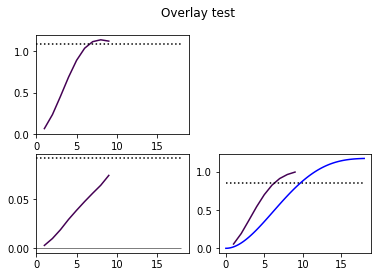

In [41]:
nv = vario.getNVar()
fig, axs = plt.subplots(nv,nv)
fig.variogram(vario=vario,idir=0,ivar=-1,jvar=-1,cmap=cmap)
axs[1,1].model(model,ivar=1,jvar=1,hmax = vario.getHmax(),
               linestyle = 'dashed', color='blue')
fig.decoration(title="Overlay test")
plt.show()